# A basic look at Job satisfaction and Remote Working Status
### Based on Stack Overflow Data

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 5000)

df_all = pd.read_csv('./survey_results_public.csv')
df_schema = pd.read_csv('./survey_results_schema.csv')

df_all.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

## A look at a variable of interest (Remote Working)

###### One main question I want to answer (as a current remote worker myself) is does Remote Working in the United States impact job happiness? Is it a valid option for companies.

In [347]:
df_all = df_all[(
    df_all.EmploymentStatus.ne(
        'Not employed, and not looking for work') &
    df_all.EmploymentStatus.ne(
        'Not employed, but looking for work') &
    df_all.EmploymentStatus.ne('Retired')
)]

In [348]:
df = df_all[df_all.Country.eq('United States')]

In [349]:
df.shape

(3975, 154)

For this analysis I will limit the data to the US job market since the audience I am interested in are Based here in the US. Here is a breakdown of how many people in the survey work each category of remote work.

I notice a spike in students who have NAN For employment questions; I realized from this spike that there are people in the dataset who are not employed and not looking for work which really won't aid in answering the question about current remote working experiences especially for students. I took them out also here above.

In [345]:
a = (df.isnull().sum()/df.shape[0]).sort_values()
a = a.quantile(np.arange(.1, 1.1, .1))
print('\nDistribution of null values in columns')
a = a.describe()[['mean', 'min', '25%', '50%', 'max']]
print('Columns have an average of {}% of values missing'.format(round(a[0]*100,2)))
a



Distribution of null values in columns
Columns have an average of 42.84% of values missing


mean    0.428445
min     0.118390
25%     0.292698
50%     0.363333
max     0.985409
dtype: float64

In [93]:
a = (df_all[df_all.Country.ne('United States')]['HomeRemote']
     .value_counts(dropna=False)
     .sort_index()
    )/(df_all[df_all.Country.ne('United States')].shape[0])

print('\n\nRemote Working In Rest of World')
a



Remote Working In Rest of World


A few days each month                                      0.333333
About half the time                                        0.036884
All or almost all the time (I'm full-time remote)          0.105384
It's complicated                                           0.034975
Less than half the time, but at least one day each week    0.082245
More than half, but not all, the time                      0.042383
Never                                                      0.329439
NaN                                                        0.035357
Name: HomeRemote, dtype: float64

In [90]:
b = (df['HomeRemote']
     .value_counts(dropna=False)
     .sort_index())/(df.shape[0])

print('\n\nRemote Working In the United States')
b



Remote Working In the United States


A few days each month                                      0.380126
About half the time                                        0.032453
All or almost all the time (I'm full-time remote)          0.136352
It's complicated                                           0.044025
Less than half the time, but at least one day each week    0.097358
More than half, but not all, the time                      0.030440
Never                                                      0.244528
NaN                                                        0.034717
Name: HomeRemote, dtype: float64

Biggest increase in full time remote workers is in the US vs the rest of the world while the rest of the world has more people that never work remotely. There is also a large decrease in the amount of people that work "Half or Most of the time" remote in the US. Seems like there are people that either work a little or a lot remotely in the US vs the rest of the world. 

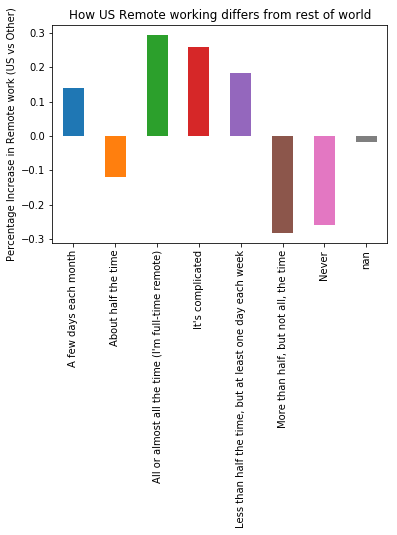

In [91]:
((b-a)/a).plot(kind='bar')
plt.title('How US Remote working differs from rest of world')
plt.ylabel('Percentage Increase in Remote work (US vs Other)');

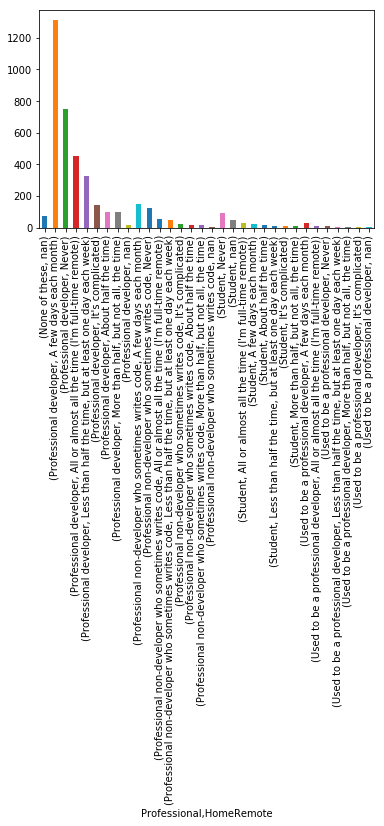

In [92]:
(df
 .groupby(['Professional'])['HomeRemote']
 .value_counts(dropna=False).plot(kind='bar'));

The dataset is pretty biased towards professional developers so we will have to be mindful of that in any communication about results we find.

## A look at a variable of interest (Job Satisfaction)

In [339]:
(df[['HomeRemote', 'JobSatisfaction']]
 .groupby('HomeRemote')
 .describe())

JobSatisfaction            \
                                                             count      mean   
HomeRemote                                                                     
A few days each month                                       1466.0  7.146658   
About half the time                                          110.0  7.390909   
All or almost all the time (I'm full-time remote)            509.0  7.412574   
It's complicated                                             166.0  6.819277   
Less than half the time, but at least one day e...           370.0  7.218919   
More than half, but not all, the time                        112.0  7.294643   
Never                                                        871.0  6.940299   

                                                                             \
                                                         std  min  25%  50%   
HomeRemote                                                                    
A few days each month                               2.051466  0.0  6.0  8.0   
About half the time                                 2.250771  1.0  6.0  8.0   
All or almost all the time (I'm full-time remote)   2.167839  0.0  6.0  8.0   
It's complicated                                    2.015964  0.0  6.0  7.0   
Less than half the time, but at least one day e...  2.124363  0.0  6.0  8.0   
More than half, but not all, the time               1.819011  2.0  6.0  8.0   
Never                                               2.243482  0.0  6.0  7.0   

                                                               
                                                    75%   max  
HomeRemote                                                     
A few days each month                               9.0  10.0  
About half the time                                 9.0  10.0  
All or almost all the time (I'm full-time remote)   9.0  10.0  
It's complicated                                    8.0  10.0  
Less than half the time, but at least one day e...  9.0  10.0  
More than half, but not all, the time               9.0  10.0  
Never                                               9.0  10.0

The Mean and Median values are both lowest for the Never and "It's Complicated" status for remote working. Also interesting is the highest minimum values came in from groups that had split time between the office and remote (there were no scores of 0 in these two subgroups)

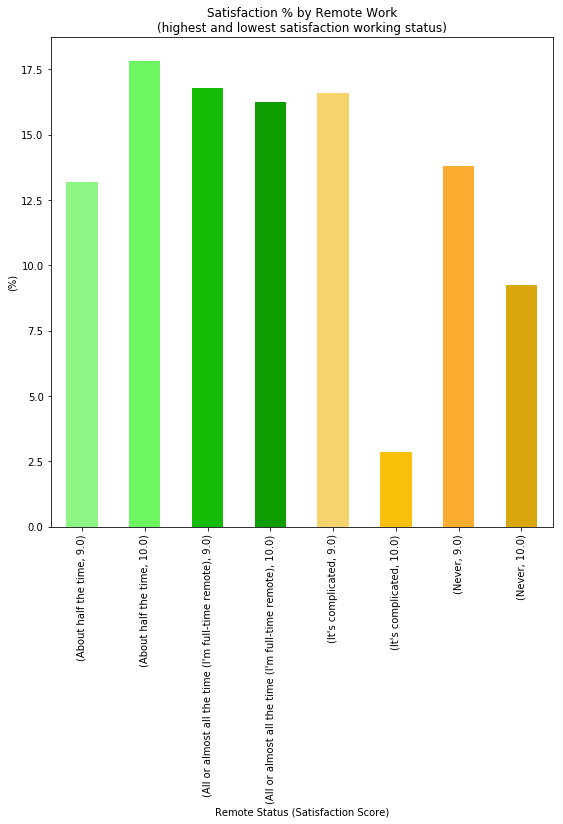

In [322]:
a = (df[(
        df.HomeRemote.eq("Never") | 
        df.HomeRemote.eq(
            "All or almost all the time (I'm full-time remote)") |
        df.HomeRemote.eq("It's complicated") |
        df.HomeRemote.eq("About half the time")
        )]
     .groupby(['HomeRemote'])['JobSatisfaction']
     .value_counts(dropna=False)
     .sort_index()
     .groupby(level=0)
     .apply(lambda x: 100*x/x.sum()))

a = a[a
      .index
      .get_level_values('JobSatisfaction')
      .isin([9,10])]

# a.take([8,9,17,18])

plot_colors = ['#8EF685', '#6DF861', '#13BB04', 
               '#0D9D01', '#F6D36C',
               '#FAC10B', '#F9AC30', '#DAA60D'] 


plt.figure(figsize=(9, 9))
a.plot(
     kind='bar', 
     title='Satisfaction % by Remote Work\n'
           '(highest and lowest satisfaction working status)',
     color=plot_colors)
plt.ylabel('(%)')
plt.xlabel('Remote Status (Satisfaction Score)');


Notes:

- Need to check if NaN values for rows with missing home remote working status are similar across my variables of interest. If they are I will just drop the 3% of missing rows that are NaN otherwise I will have to figure out an imputation method for that column. 

- Want to try 3 ways of doing a regression and calculate the metrics. 1. just dropping any rows that have missing. 2. using simple imputation like mean and median and 3. impute values using some of the columns I will chose to drop as a way of importing some of the omitted bias back into the data even though the columns are dropped (Might be a good way of using trash you were going to throw away)

### Sources Used

https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
